<a href="https://colab.research.google.com/github/jafar-albadarneh/data-science-pot/blob/master/MNIST_classification_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset classification using KNN

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [12]:
# Load Dataset (Bunch: dictionary-like/dataframe-like)
digits = datasets.load_digits()
print("Dataset (bunch) keys: {}".format(digits.keys()))
print("Image sample: {}".format(digits.data[0]))

Dataset (bunch) keys: dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Image sample: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


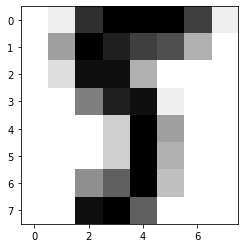

Target label is: 5


In [18]:
# Display sample image
plt.imshow(digits.images[893], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print("Target label is: {}".format(digits.target[893]))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42, stratify=digits.target)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
score = round(knn.score(X_test, y_test) * 100,2)
print('Classification Accuracy :{}%'.format(score))

Classification Accuracy :98.06%


## Tune classifer parameter K

In order to evaluate Over-fitting and Under-fitting, multiple K values will be tested

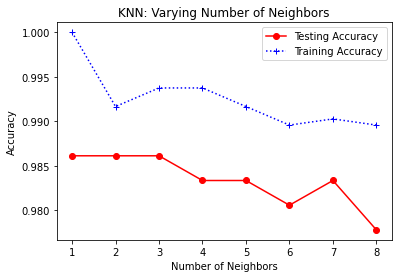

In [28]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  #Compute accuracy on the training set
  train_accuracy[i] = knn.score(X_train, y_train)
  #Compute accuracy on the testing set
  test_accuracy[i] = knn.score(X_test, y_test)

# Study the graph
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', marker='o', linestyle='-', color='r')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', marker='+', linestyle='dotted', color='b')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

**We can conclude that using eight neighbors `K=8` underfits the data. Using 1,2,3 neighbors resulted in highest accuracy rates `>98.5%` which might represent an overfitting scenario.**